In [1]:
#probabilities for fraud and legitimate cases
p_fraud=0.10 #only 10 insurance claims are fraudulent
p_legit=0.90 #90% insurance claims are legitimate

p_unusual_give_fraud=0.80
p_unusual_give_legit=0.20

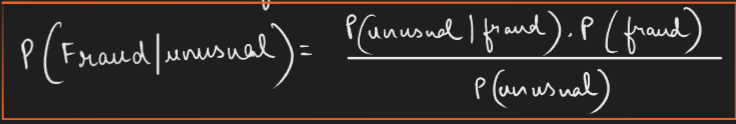

In [2]:
p_unusual=(p_unusual_give_fraud*p_fraud)+(p_unusual_give_legit*p_legit)

p_fraud_given_unusual=(p_unusual_give_fraud*p_fraud)/p_unusual

In [5]:
print(f"probability that a claim with unusual pattern is fraud:{p_fraud_given_unusual:.4f}")

probability that a claim with unusual pattern is fraud:0.3077


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
n=10000 #10000 insurance claims

is_fraud=np.random.choice(['fraud','legit'],size=n,p=[p_fraud,p_legit])

unusual_pattern=[]

for claim in is_fraud:
  if claim=='fraud':
    unusual_pattern.append(np.random.rand()<p_unusual_give_fraud)
  else:
    unusual_pattern.append(np.random.rand()<p_unusual_give_legit)

df=pd.DataFrame({'claim_type':is_fraud,'unusual':unusual_pattern})

In [9]:
df.head(10)

,claim_type,unusual
0,legit,False
1,legit,True
2,legit,False
3,legit,False
4,fraud,True
5,legit,False
6,legit,False
7,legit,False
8,legit,False
9,legit,True


In [10]:
fraud_and_unusual=df[(df.claim_type=='fraud') & (df.unusual)].shape[0]
total_unusual=df[df.unusual].shape[0]

In [11]:
p_df=fraud_and_unusual/total_unusual
print(f"probability on dataframe of a fraud claim with unusual pattern is fraud:{p_df:.2f}")

probability on dataframe of a fraud claim with unusual pattern is fraud:0.31


<Axes: xlabel='claim_type', ylabel='count'>

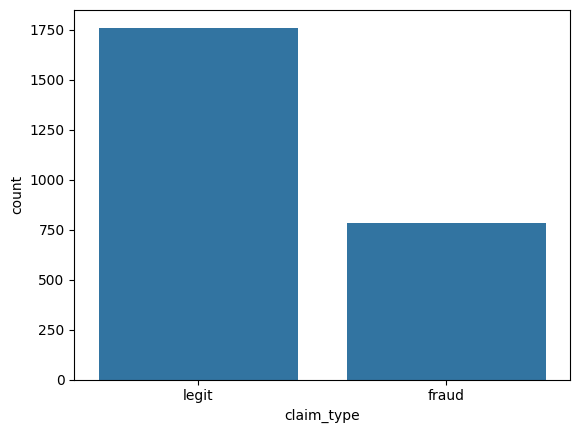

In [12]:
sns.countplot(data=df[df.unusual],x='claim_type')

Q. How will the probability change if 95% of fraudulent claims show unusual pattern and 30% legitimate claims also show unusual patterns

Hint: p_unusual_given_legit and p_unusual_given_fraud to be updated and accordingly p_fraud_given_unusual needs to be computed